In [6]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [8]:
import networkx as nx
import time
import random
import numpy as np
import pandas as pd
from random import randint
from multiprocessing.pool import Pool
from itertools import combinations
from psutil import Popen, TimeoutExpired
from networkx import Graph
from tempfile import NamedTemporaryFile
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
sns.set() # set the default Seaborn style for graphics

In [ ]:
# Load the results CSV file
df = pd.read_csv('results.csv')

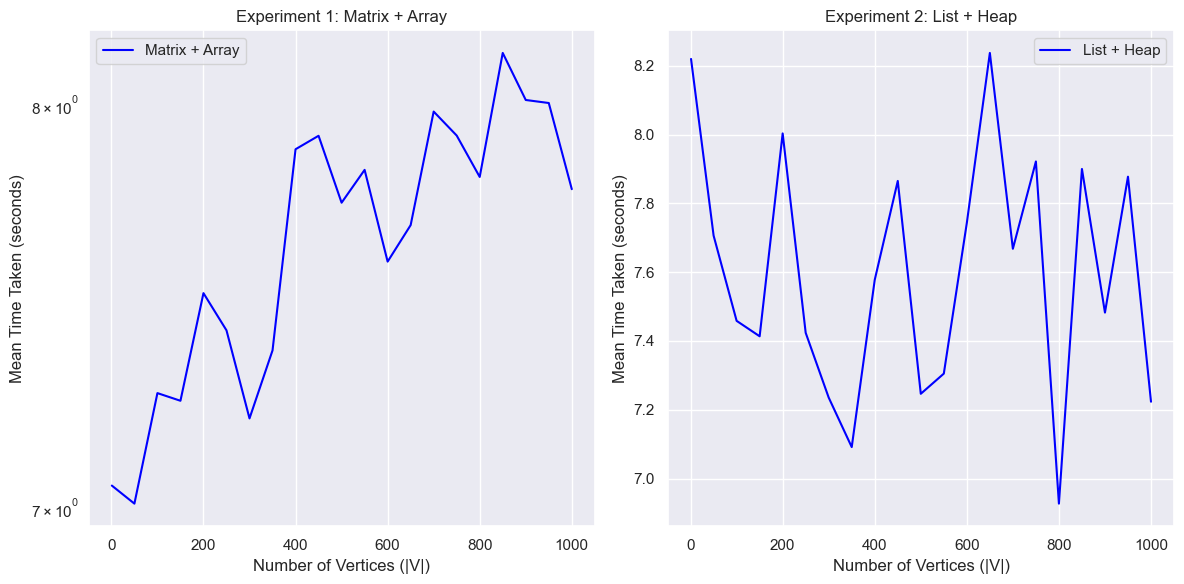

In [34]:
# Grouping for Experiment 1: Adjacency Matrix and Priority Queue as Array
experiment_1 = df[(df['graph_adj'] == 'matrix') & (df['priority_queue'] == 'array')]
grouped_experiment_1 = experiment_1.groupby(['n_vertex']).agg({
    'ram': ['mean', 'std'],   
    'time': ['mean', 'std']    
}).reset_index()
grouped_experiment_1.columns = ['n_vertex', 'mean_ram', 'std_ram', 'mean_time_taken', 'std_time_taken']

# Grouping for Experiment 2: Adjacency List and Priority Queue as Heap
experiment_2 = df[(df['graph_adj'] == 'list') & (df['priority_queue'] == 'heap')]
grouped_experiment_2 = experiment_2.groupby(['n_vertex']).agg({
    'ram': ['mean', 'std'],   
    'time': ['mean', 'std']    
}).reset_index()
grouped_experiment_2.columns = ['n_vertex', 'mean_ram', 'std_ram', 'mean_time_taken', 'std_time_taken']

# Plotting
plt.figure(figsize=(12, 6))

# Subplot for Experiment 1
plt.subplot(1, 2, 1)
sns.lineplot(data=grouped_experiment_1, x='n_vertex', y='mean_time_taken', label='Matrix + Array', color='blue')
plt.title('Experiment 1: Matrix + Array')
plt.xlabel('Number of Vertices (|V|)')
plt.ylabel('Mean Time Taken (seconds)')
plt.yscale('log')  # Set y-axis to logarithmic scale for better visibility
plt.legend()
plt.grid(True)

# Subplot for Experiment 2
plt.subplot(1, 2, 2)
sns.lineplot(data=grouped_experiment_2, x='n_vertex', y='mean_time_taken', label='List + Heap', color='blue')
plt.title('Experiment 2: List + Heap')
plt.xlabel('Number of Vertices (|V|)')
plt.ylabel('Mean Time Taken (seconds)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


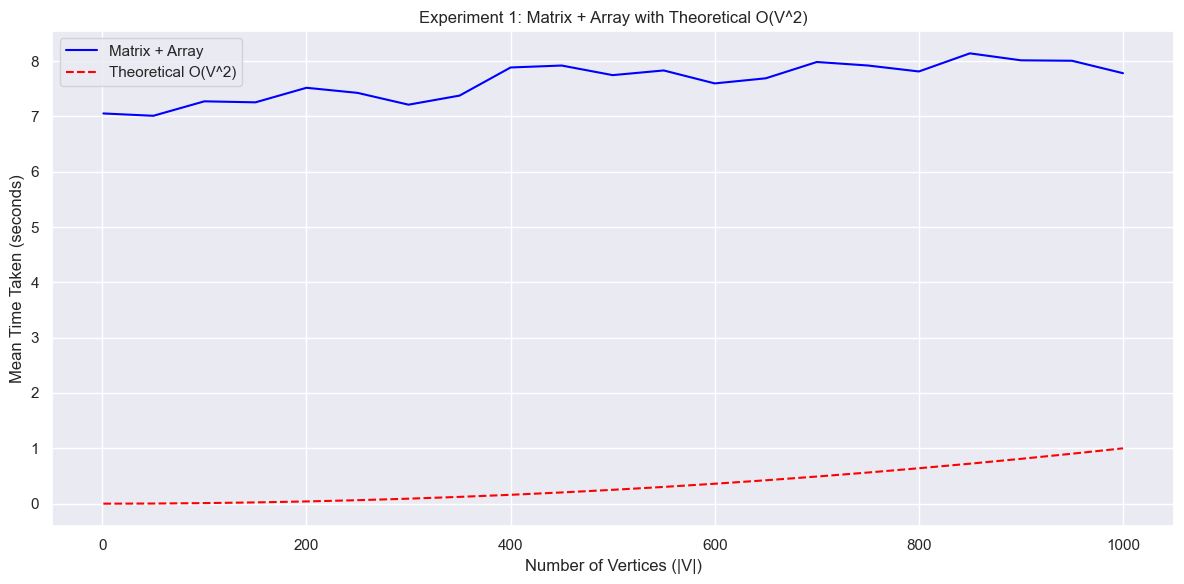

In [23]:
# Grouping for Experiment 1: Adjacency Matrix and Priority Queue as Array
experiment_1 = df[(df['graph_adj'] == 'matrix') & (df['priority_queue'] == 'array')]
grouped_experiment_1 = experiment_1.groupby(['n_vertex']).agg({
    'ram': ['mean', 'std'],   
    'time': ['mean', 'std']    
}).reset_index()
grouped_experiment_1.columns = ['n_vertex', 'mean_ram', 'std_ram', 'mean_time_taken', 'std_time_taken']

# Generate the theoretical O(V^2) data
grouped_experiment_1['theoretical_O_V2'] = grouped_experiment_1['n_vertex'] ** 2 * (1e-6)  # Scale to seconds

# Plotting
plt.figure(figsize=(12, 6))

# Subplot for Experiment 1 with O(V^2)
plt.subplot(1, 1, 1)
sns.lineplot(data=grouped_experiment_1, x='n_vertex', y='mean_time_taken', label='Matrix + Array', color='blue')
sns.lineplot(data=grouped_experiment_1, x='n_vertex', y='theoretical_O_V2', label='Theoretical O(V^2)', color='red', linestyle='--')
plt.title('Experiment 1: Matrix + Array with Theoretical O(V^2)')
plt.xlabel('Number of Vertices (|V|)')
plt.ylabel('Mean Time Taken (seconds)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

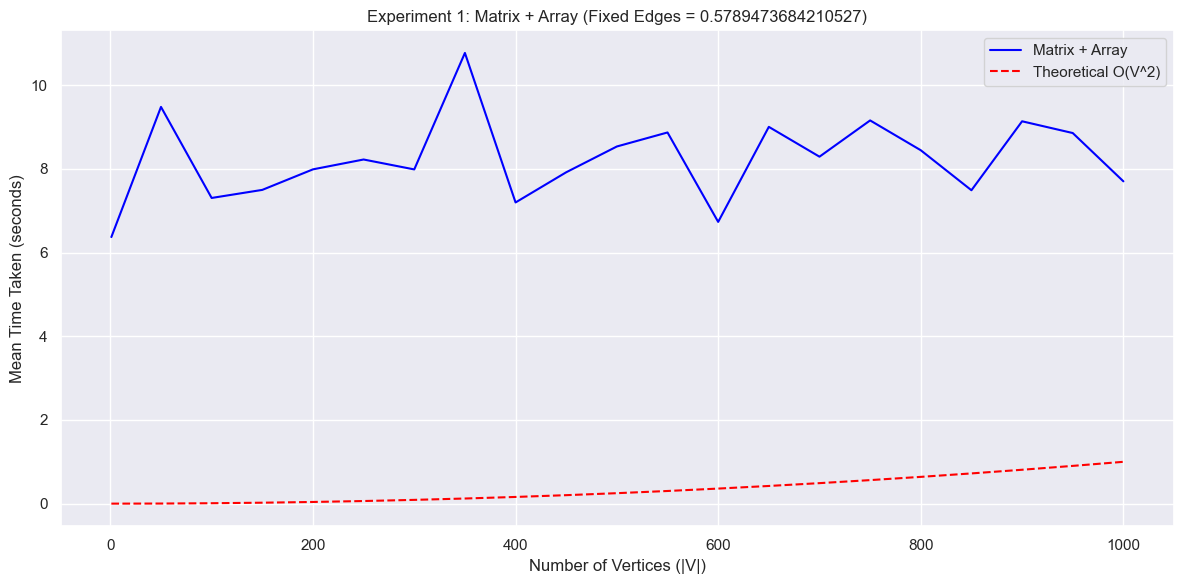

In [33]:
# Set the fixed number of edges
fixed_edges = 0.5789473684210527  # or any desired number of edges

# Filter the DataFrame for Experiment 1: Adjacency Matrix and Priority Queue as Array
experiment_1 = df[(df['graph_adj'] == 'matrix') & 
                   (df['priority_queue'] == 'array') & 
                   (df['p_edge'] == fixed_edges)]

# Grouping for Experiment 1
grouped_experiment_1 = experiment_1.groupby(['n_vertex']).agg({
    'ram': ['mean', 'std'],   
    'time': ['mean', 'std']    
}).reset_index()

grouped_experiment_1.columns = ['n_vertex', 'mean_ram', 'std_ram', 'mean_time_taken', 'std_time_taken']

# Generate the theoretical O(V^2) data
grouped_experiment_1['theoretical_O_V2'] = grouped_experiment_1['n_vertex'] ** 2 * (1e-6)  # Scale to seconds

# Plotting
plt.figure(figsize=(12, 6))

# Plot for Experiment 1 with O(V^2)
sns.lineplot(data=grouped_experiment_1, x='n_vertex', y='mean_time_taken', label='Matrix + Array', color='blue')
sns.lineplot(data=grouped_experiment_1, x='n_vertex', y='theoretical_O_V2', label='Theoretical O(V^2)', color='red', linestyle='--')
plt.title(f'Experiment 1: Matrix + Array (Fixed Edges = {fixed_edges})')
plt.xlabel('Number of Vertices (|V|)')
plt.ylabel('Mean Time Taken (seconds)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

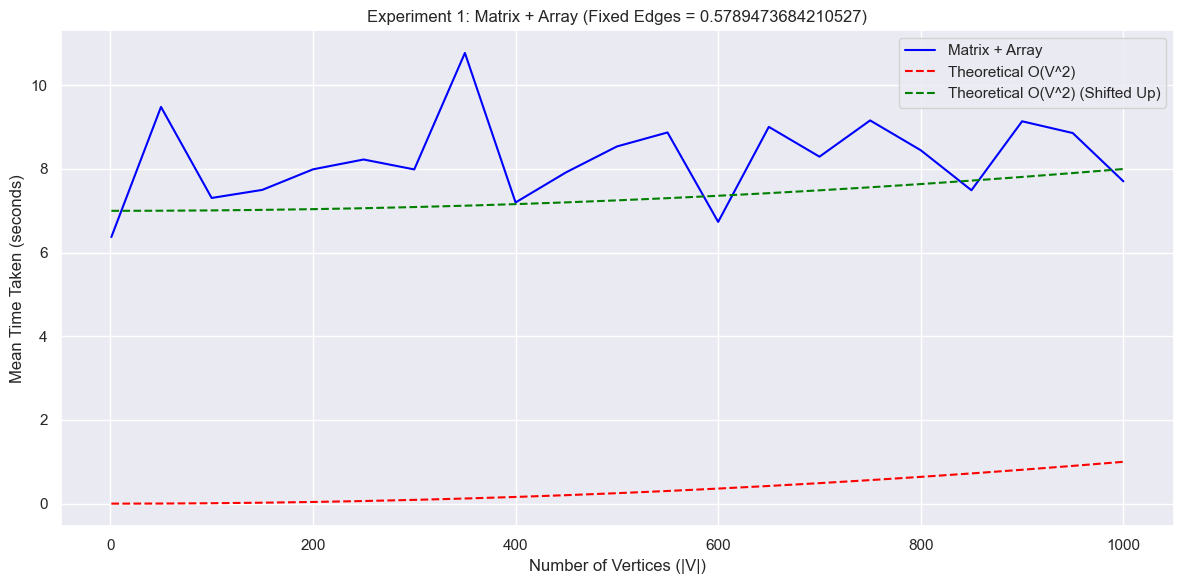

In [40]:
# Load the results CSV file
df = pd.read_csv('results.csv')

# Set the fixed number of edges
fixed_edges = 0.5789473684210527  # or any desired number of edges

# Filter the DataFrame for Experiment 1: Adjacency Matrix and Priority Queue as Array
experiment_1 = df[(df['graph_adj'] == 'matrix') & 
                   (df['priority_queue'] == 'array') & 
                   (df['p_edge'] == fixed_edges)]

# Grouping for Experiment 1
grouped_experiment_1 = experiment_1.groupby(['n_vertex']).agg({
    'ram': ['mean', 'std'],   
    'time': ['mean', 'std']    
}).reset_index()

grouped_experiment_1.columns = ['n_vertex', 'mean_ram', 'std_ram', 'mean_time_taken', 'std_time_taken']

# Generate the theoretical O(V^2) data
grouped_experiment_1['theoretical_O_V2'] = (grouped_experiment_1['n_vertex'] ** 2 * (1e-6))  # Scale to seconds
shifting_factor = 7  # This will be added to the theoretical graph

# Plotting
plt.figure(figsize=(12, 6))

# Plot for Experiment 1 with scaled O(V^2)
sns.lineplot(data=grouped_experiment_1, x='n_vertex', y='mean_time_taken', label='Matrix + Array', color='blue')
sns.lineplot(data=grouped_experiment_1, x='n_vertex', y='theoretical_O_V2', label='Theoretical O(V^2)', color='red', linestyle='--')

# Add the shifted theoretical line
plt.plot(grouped_experiment_1['n_vertex'], grouped_experiment_1['theoretical_O_V2'] + shifting_factor, 
         color='green', linestyle='--', label='Theoretical O(V^2) (Shifted Up)')

# Title and labels
plt.title(f'Experiment 1: Matrix + Array (Fixed Edges = {fixed_edges})')
plt.xlabel('Number of Vertices (|V|)')
plt.ylabel('Mean Time Taken (seconds)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

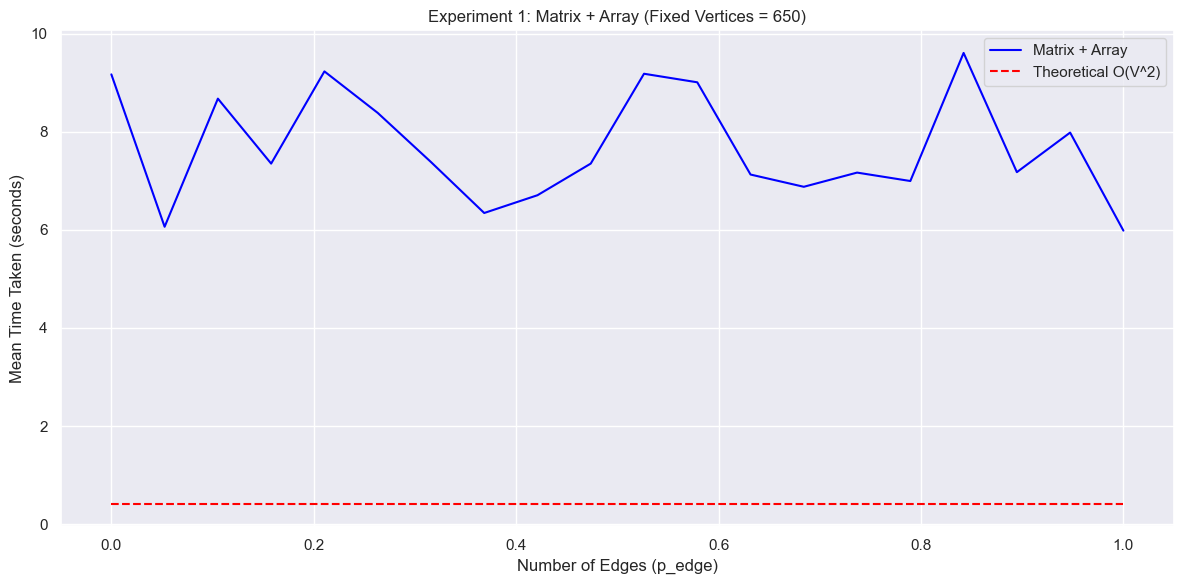

In [47]:
# Load the results CSV file
df = pd.read_csv('results.csv')

# Set the fixed number of vertices
fixed_vertices = 650  # Fixed number of vertices

# Filter the DataFrame for Experiment 1: Adjacency Matrix and Priority Queue as Array with fixed vertices
experiment_1 = df[(df['graph_adj'] == 'matrix') & 
                   (df['priority_queue'] == 'array') & 
                   (df['n_vertex'] == fixed_vertices)]  # Only fixed vertices

# Grouping for Experiment 1
grouped_experiment_1 = experiment_1.groupby(['p_edge', 'n_vertex']).agg({
    'ram': ['mean', 'std'],   
    'time': ['mean', 'std']    
}).reset_index()

grouped_experiment_1.columns = ['p_edge', 'n_vertex', 'mean_ram', 'std_ram', 'mean_time_taken', 'std_time_taken']

# Generate the theoretical O(V^2) data
grouped_experiment_1['theoretical_O_V2'] = (grouped_experiment_1['n_vertex'] ** 2 * (1e-6))  # Scale to seconds

# Plotting
plt.figure(figsize=(12, 6))

# Plot for Experiment 1 with O(V^2)
sns.lineplot(data=grouped_experiment_1, x='p_edge', y='mean_time_taken', label='Matrix + Array', color='blue')
sns.lineplot(data=grouped_experiment_1, x='p_edge', y='theoretical_O_V2', label='Theoretical O(V^2)', color='red', linestyle='--')

# Title and labels
plt.title(f'Experiment 1: Matrix + Array (Fixed Vertices = {fixed_vertices})')
plt.xlabel('Number of Edges (p_edge)')
plt.ylabel('Mean Time Taken (seconds)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

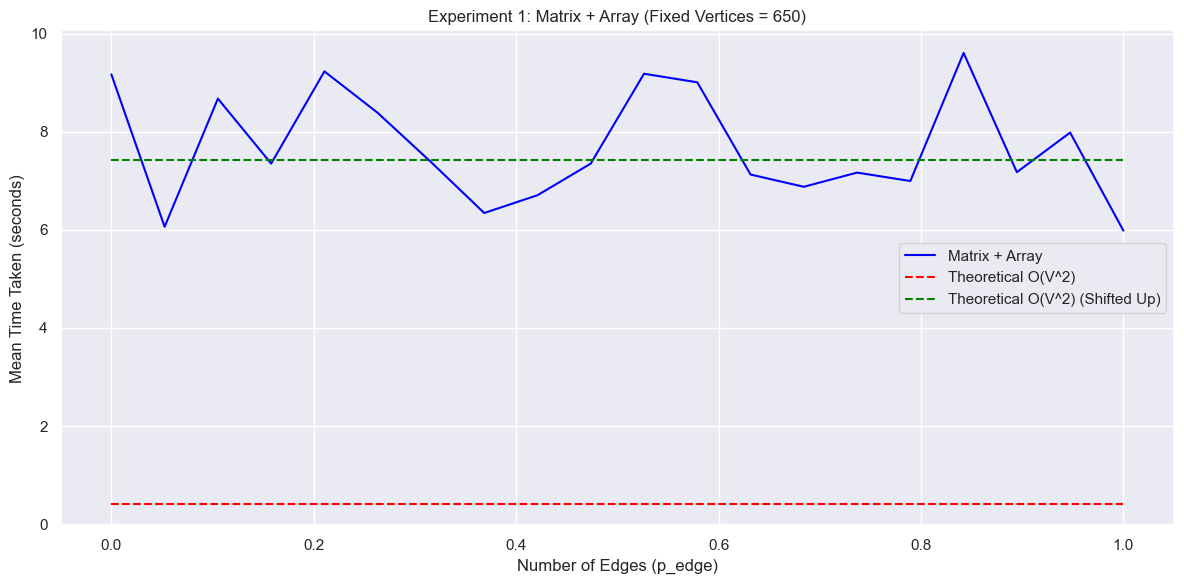

In [46]:
# Load the results CSV file
df = pd.read_csv('results.csv')

# Set the fixed number of vertices
fixed_vertices = 650  # Fixed number of vertices

# Filter the DataFrame for Experiment 1: Adjacency Matrix and Priority Queue as Array with fixed vertices
# Here, we're not fixing the edges; we will group by edges later.
experiment_1 = df[(df['graph_adj'] == 'matrix') & 
                   (df['priority_queue'] == 'array') & 
                   (df['n_vertex'] == fixed_vertices)]  # Only fixed vertices

# Grouping for Experiment 1
grouped_experiment_1 = experiment_1.groupby(['p_edge', 'n_vertex']).agg({
    'ram': ['mean', 'std'],   
    'time': ['mean', 'std']    
}).reset_index()

grouped_experiment_1.columns = ['p_edge', 'n_vertex', 'mean_ram', 'std_ram', 'mean_time_taken', 'std_time_taken']

# Generate the theoretical O(V^2) data
grouped_experiment_1['theoretical_O_V2'] = (grouped_experiment_1['n_vertex'] ** 2 * (1e-6))  # Scale to seconds
shifting_factor = 7  # This will be added to the theoretical graph

# Plotting
plt.figure(figsize=(12, 6))

# Plot for Experiment 1 with scaled O(V^2) for varying edges
sns.lineplot(data=grouped_experiment_1, x='p_edge', y='mean_time_taken', label='Matrix + Array', color='blue')
sns.lineplot(data=grouped_experiment_1, x='p_edge', y='theoretical_O_V2', label='Theoretical O(V^2)', color='red', linestyle='--')

# Add the shifted theoretical line
plt.plot(grouped_experiment_1['p_edge'], 
         grouped_experiment_1['theoretical_O_V2'] + shifting_factor, 
         color='green', linestyle='--', label='Theoretical O(V^2) (Shifted Up)')

# Title and labels
plt.title(f'Experiment 1: Matrix + Array (Fixed Vertices = {fixed_vertices})')
plt.xlabel('Number of Edges (p_edge)')
plt.ylabel('Mean Time Taken (seconds)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

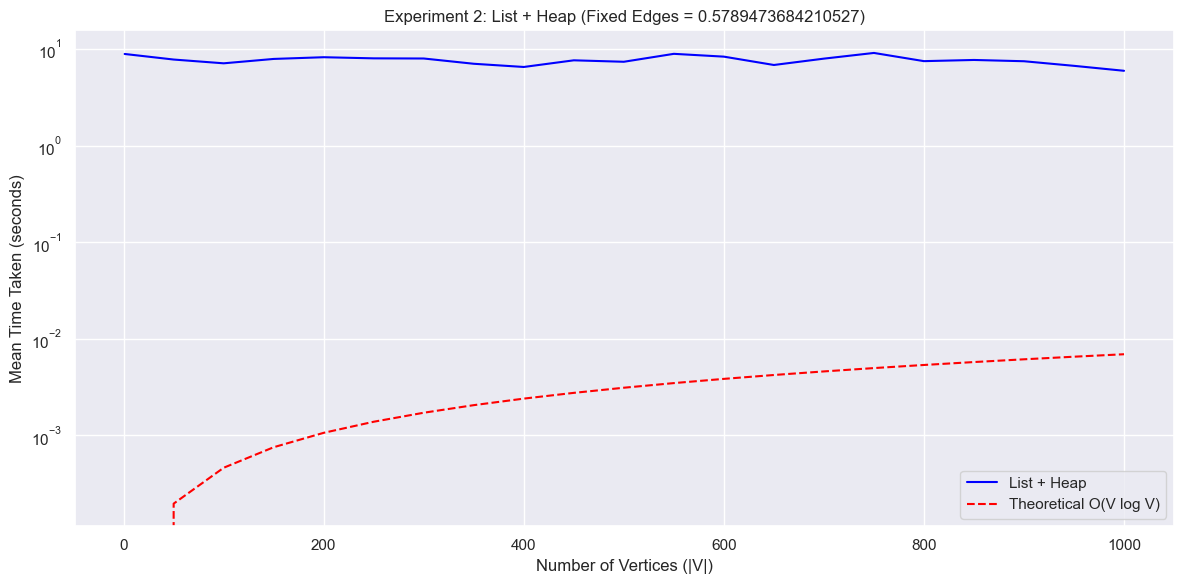

In [55]:
# Set the fixed number of edges
fixed_edges = 0.5789473684210527  # or any desired number of edges

# Filter the DataFrame for Experiment 2: Adjacency List and Priority Queue as Heap
experiment_2 = df[(df['graph_adj'] == 'list') & 
                   (df['priority_queue'] == 'heap') & 
                   (df['p_edge'] == fixed_edges)]

# Grouping for Experiment 2
grouped_experiment_2 = experiment_2.groupby(['n_vertex']).agg({
    'ram': ['mean', 'std'],   
    'time': ['mean', 'std']    
}).reset_index()

grouped_experiment_2.columns = ['n_vertex', 'mean_ram', 'std_ram', 'mean_time_taken', 'std_time_taken']

# Generate the theoretical O(V log V) data
scaling_factor = 1e-6  # Adjust this factor to better match the actual times
grouped_experiment_2['theoretical_O_V_log_V'] = (grouped_experiment_2['n_vertex'] * np.log(grouped_experiment_2['n_vertex'])) * scaling_factor

# Plotting
plt.figure(figsize=(12, 6))

# Plot for Experiment 2 with scaled O(V log V)
sns.lineplot(data=grouped_experiment_2, x='n_vertex', y='mean_time_taken', label='List + Heap', color='blue')
sns.lineplot(data=grouped_experiment_2, x='n_vertex', y='theoretical_O_V_log_V', label='Theoretical O(V log V)', color='red', linestyle='--')

# Apply logarithmic scale to the y-axis
plt.yscale('log')

# Title and labels
plt.title(f'Experiment 2: List + Heap (Fixed Edges = {fixed_edges})')
plt.xlabel('Number of Vertices (|V|)')
plt.ylabel('Mean Time Taken (seconds)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

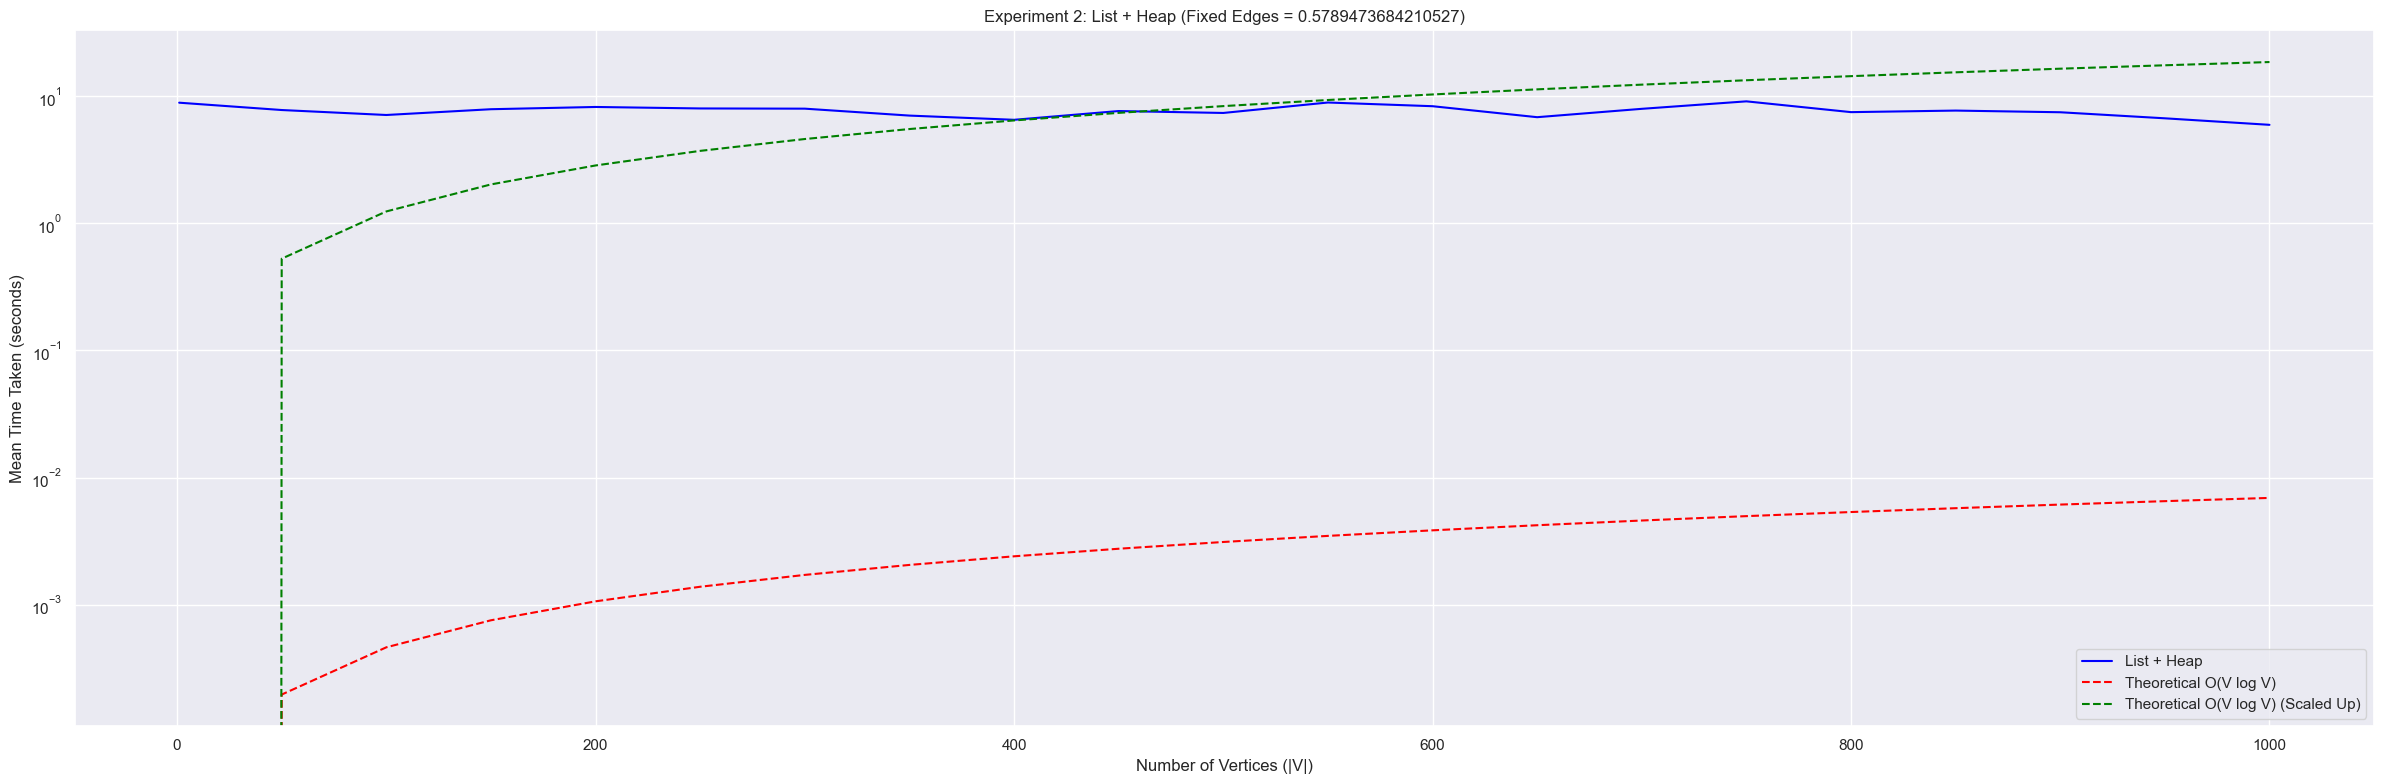

In [80]:
# Set the fixed number of edges
fixed_edges = 0.5789473684210527  # or any desired number of edges

# Filter the DataFrame for Experiment 2: Adjacency List and Priority Queue as Heap
experiment_2 = df[(df['graph_adj'] == 'list') & 
                   (df['priority_queue'] == 'heap') & 
                   (df['p_edge'] == fixed_edges)]

# Grouping for Experiment 2
grouped_experiment_2 = experiment_2.groupby(['n_vertex']).agg({
    'ram': ['mean', 'std'],   
    'time': ['mean', 'std']    
}).reset_index()

grouped_experiment_2.columns = ['n_vertex', 'mean_ram', 'std_ram', 'mean_time_taken', 'std_time_taken']

# Generate the theoretical O(V log V) data
scaling_factor = 1e-6  # Adjust this factor to better match the actual times
grouped_experiment_2['theoretical_O_V_log_V'] = (grouped_experiment_2['n_vertex'] * np.log(grouped_experiment_2['n_vertex'])) * scaling_factor

# Apply a scaling factor to "shift" the graph up (instead of adding a constant, we multiply to keep the shape)
shifted_scaling_factor = 2700  # Adjust to shift the theoretical graph upward
grouped_experiment_2['theoretical_O_V_log_V_shifted'] = grouped_experiment_2['theoretical_O_V_log_V'] * shifted_scaling_factor

# Plotting
plt.figure(figsize=(24, 8))

# Plot for Experiment 2 with O(V log V)
sns.lineplot(data=grouped_experiment_2, x='n_vertex', y='mean_time_taken', label='List + Heap', color='blue')

# Plot the original theoretical graph in red
sns.lineplot(data=grouped_experiment_2, x='n_vertex', y='theoretical_O_V_log_V', 
             label='Theoretical O(V log V)', color='red', linestyle='--')

# Plot the shifted theoretical graph in green (scaled, not just shifted)
sns.lineplot(data=grouped_experiment_2, x='n_vertex', y='theoretical_O_V_log_V_shifted', 
             label='Theoretical O(V log V) (Scaled Up)', color='green', linestyle='--')

# Apply logarithmic scale to the y-axis
plt.yscale('log')

# Title and labels
plt.title(f'Experiment 2: List + Heap (Fixed Edges = {fixed_edges})')
plt.xlabel('Number of Vertices (|V|)')
plt.ylabel('Mean Time Taken (seconds)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

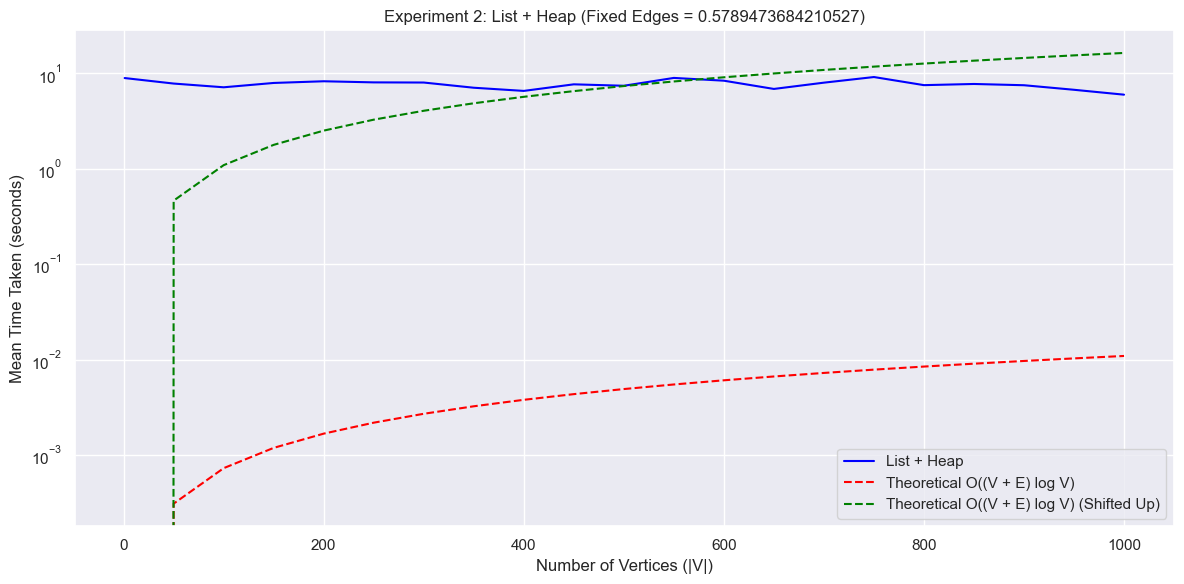

In [88]:
# Set the fixed number of edges
fixed_edges = 0.5789473684210527  # or any desired number of edges

# Filter the DataFrame for Experiment 2: Adjacency List and Priority Queue as Heap
experiment_2 = df[(df['graph_adj'] == 'list') & 
                   (df['priority_queue'] == 'heap') & 
                   (df['p_edge'] == fixed_edges)]

# Grouping for Experiment 2
grouped_experiment_2 = experiment_2.groupby(['n_vertex']).agg({
    'ram': ['mean', 'std'],   
    'time': ['mean', 'std']    
}).reset_index()

grouped_experiment_2.columns = ['n_vertex', 'mean_ram', 'std_ram', 'mean_time_taken', 'std_time_taken']

# Define the number of edges based on the fixed edges
grouped_experiment_2['n_edges'] = fixed_edges * grouped_experiment_2['n_vertex']  # Calculate total edges (E)

# Generate the theoretical O((V + E) log V) data
scaling_factor = 1e-6  # Adjust this factor to better match the actual times
grouped_experiment_2['theoretical_O_V_plus_E_log_V'] = ((grouped_experiment_2['n_vertex'] + grouped_experiment_2['n_edges']) * 
                                                           np.log(grouped_experiment_2['n_vertex'])) * scaling_factor

# Apply a scaling factor to "shift" the graph up (using a multiplicative factor)
shifted_scaling_factor = 1500 # Adjust to shift the theoretical graph upward
grouped_experiment_2['theoretical_O_V_plus_E_log_V_shifted'] = (grouped_experiment_2['theoretical_O_V_plus_E_log_V'] * 
                                                                   shifted_scaling_factor)

# Plotting
plt.figure(figsize=(12, 6))

# Plot for Experiment 2 with O((V + E) log V)
sns.lineplot(data=grouped_experiment_2, x='n_vertex', y='mean_time_taken', label='List + Heap', color='blue')

# Plot the original theoretical graph in red
sns.lineplot(data=grouped_experiment_2, x='n_vertex', y='theoretical_O_V_plus_E_log_V', 
             label='Theoretical O((V + E) log V)', color='red', linestyle='--')

# Plot the shifted theoretical graph in green (scaled, not just shifted)
sns.lineplot(data=grouped_experiment_2, x='n_vertex', y='theoretical_O_V_plus_E_log_V_shifted', 
             label='Theoretical O((V + E) log V) (Shifted Up)', color='green', linestyle='--')

# Apply logarithmic scale to the y-axis
plt.yscale('log')

# Title and labels
plt.title(f'Experiment 2: List + Heap (Fixed Edges = {fixed_edges})')
plt.xlabel('Number of Vertices (|V|)')
plt.ylabel('Mean Time Taken (seconds)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

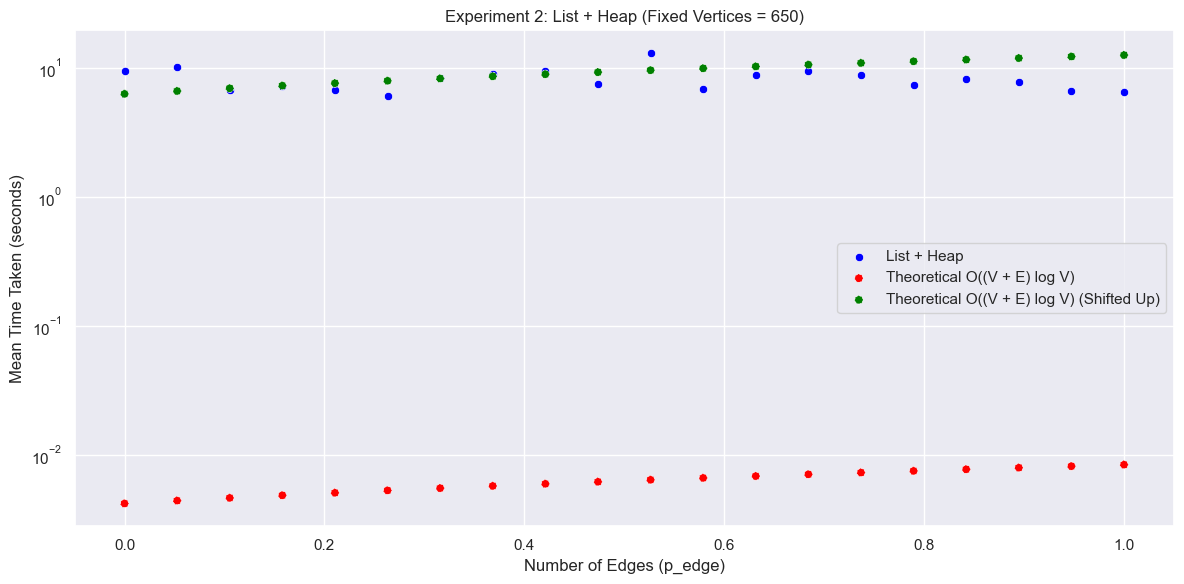

In [91]:
# Set the fixed number of vertices
fixed_vertices = 650  # Fixed number of vertices

# Filter the DataFrame for Experiment 2: Adjacency List and Priority Queue as Heap with fixed vertices
# Here, we're not fixing the edges; we will group by edges later.
experiment_2 = df[(df['graph_adj'] == 'list') & 
                   (df['priority_queue'] == 'heap') & 
                   (df['n_vertex'] == fixed_vertices)]  # Only fixed vertices

# Grouping for Experiment 2
grouped_experiment_2 = experiment_2.groupby(['p_edge']).agg({
    'ram': ['mean', 'std'],   
    'time': ['mean', 'std']    
}).reset_index()

grouped_experiment_2.columns = ['p_edge', 'mean_ram', 'std_ram', 'mean_time_taken', 'std_time_taken']

# Define the number of edges based on the p_edge ratio and fixed vertices
grouped_experiment_2['n_edges'] = grouped_experiment_2['p_edge'] * fixed_vertices  # Calculate total edges (E)

# Generate the theoretical O((V + E) log V) data
scaling_factor = 1e-6  # Adjust this factor to better match the actual times
grouped_experiment_2['theoretical_O_V_plus_E_log_V'] = ((fixed_vertices + grouped_experiment_2['n_edges']) * 
                                                           np.log(fixed_vertices)) * scaling_factor

# Apply a scaling factor to "shift" the graph up (using a multiplicative factor)
shifted_scaling_factor = 1500  # Adjust to shift the theoretical graph upward
grouped_experiment_2['theoretical_O_V_plus_E_log_V_shifted'] = (grouped_experiment_2['theoretical_O_V_plus_E_log_V'] * 
                                                                   shifted_scaling_factor)

# Plotting
plt.figure(figsize=(12, 6))

# Plot for Experiment 2 with O((V + E) log V)
sns.scatterplot(data=grouped_experiment_2, x='p_edge', y='mean_time_taken', label='List + Heap', color='blue')

# Plot the original theoretical graph in red
sns.scatterplot(data=grouped_experiment_2, x='p_edge', y='theoretical_O_V_plus_E_log_V', 
             label='Theoretical O((V + E) log V)', color='red', linestyle='--')

# Plot the shifted theoretical graph in green (scaled, not just shifted)
sns.scatterplot(data=grouped_experiment_2, x='p_edge', y='theoretical_O_V_plus_E_log_V_shifted', 
             label='Theoretical O((V + E) log V) (Shifted Up)', color='green', linestyle='--')

# Apply logarithmic scale to the y-axis
plt.yscale('log')

# Title and labels
plt.title(f'Experiment 2: List + Heap (Fixed Vertices = {fixed_vertices})')
plt.xlabel('Number of Edges (p_edge)')
plt.ylabel('Mean Time Taken (seconds)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

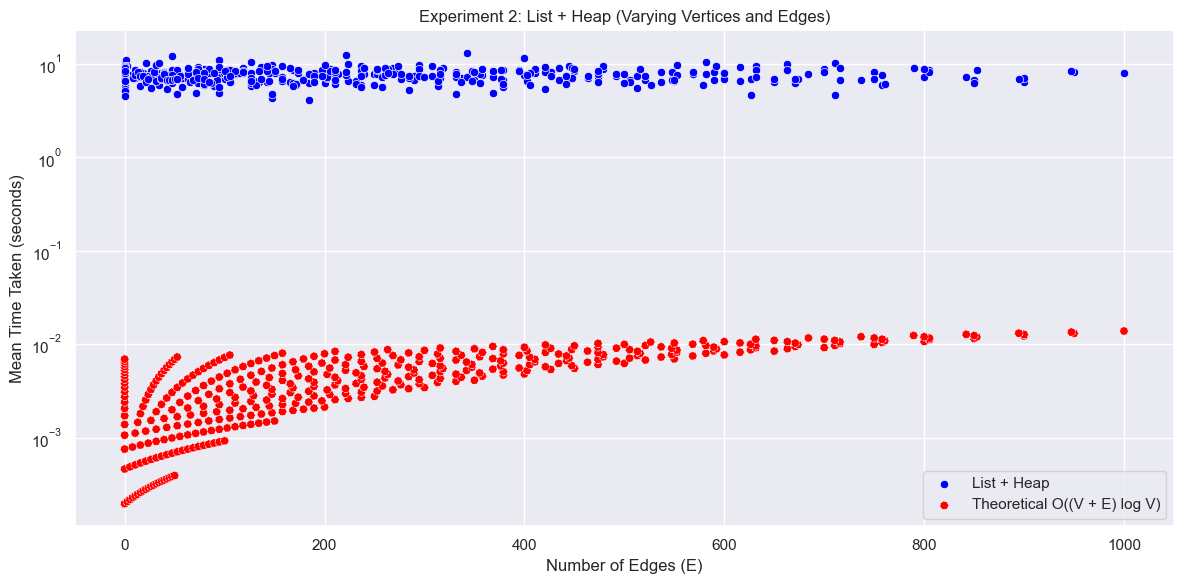

In [90]:
# Filter the DataFrame for Experiment 2: Adjacency List and Priority Queue as Heap
experiment_2 = df[(df['graph_adj'] == 'list') & 
                   (df['priority_queue'] == 'heap')]

# Grouping for Experiment 2
grouped_experiment_2 = experiment_2.groupby(['n_vertex', 'p_edge']).agg({
    'ram': ['mean', 'std'],   
    'time': ['mean', 'std']    
}).reset_index()

grouped_experiment_2.columns = ['n_vertex', 'p_edge', 'mean_ram', 'std_ram', 'mean_time_taken', 'std_time_taken']

# Define the number of edges based on the edges ratio and the number of vertices
grouped_experiment_2['n_edges'] = grouped_experiment_2['p_edge'] * grouped_experiment_2['n_vertex']  # Calculate total edges (E)

# Generate the theoretical O((V + E) log V) data for all combinations
scaling_factor = 1e-6  # Adjust this factor to better match the actual times
grouped_experiment_2['theoretical_O_V_plus_E_log_V'] = (
    (grouped_experiment_2['n_vertex'] + grouped_experiment_2['n_edges']) * 
    np.log(grouped_experiment_2['n_vertex'])
) * scaling_factor

# Plotting
plt.figure(figsize=(12, 6))

# Plot for Experiment 2 with O((V + E) log V)
sns.scatterplot(data=grouped_experiment_2, x='n_edges', y='mean_time_taken', label='List + Heap', color='blue')

# Plot the theoretical graph in red
sns.scatterplot(data=grouped_experiment_2, x='n_edges', y='theoretical_O_V_plus_E_log_V', 
             label='Theoretical O((V + E) log V)', color='red', linestyle='--')

# Apply logarithmic scale to the y-axis
plt.yscale('log')

# Title and labels
plt.title('Experiment 2: List + Heap (Varying Vertices and Edges)')
plt.xlabel('Number of Edges (E)')
plt.ylabel('Mean Time Taken (seconds)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

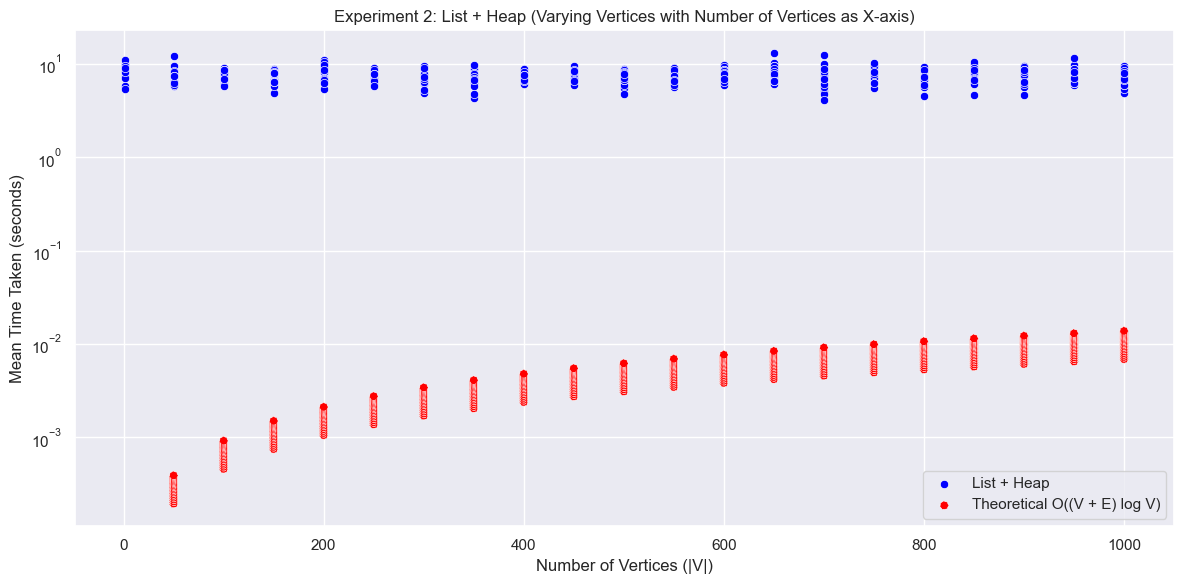

In [93]:
# Filter the DataFrame for Experiment 2: Adjacency List and Priority Queue as Heap
experiment_2 = df[(df['graph_adj'] == 'list') & 
                   (df['priority_queue'] == 'heap')]

# Grouping for Experiment 2
grouped_experiment_2 = experiment_2.groupby(['n_vertex', 'p_edge']).agg({
    'ram': ['mean', 'std'],   
    'time': ['mean', 'std']    
}).reset_index()

grouped_experiment_2.columns = ['n_vertex', 'p_edge', 'mean_ram', 'std_ram', 'mean_time_taken', 'std_time_taken']

# Define the number of edges based on the edges ratio and the number of vertices
grouped_experiment_2['n_edges'] = grouped_experiment_2['p_edge'] * grouped_experiment_2['n_vertex']  # Calculate total edges (E)

# Generate the theoretical O((V + E) log V) data for all combinations
scaling_factor = 1e-6  # Adjust this factor to better match the actual times
grouped_experiment_2['theoretical_O_V_plus_E_log_V'] = (
    (grouped_experiment_2['n_vertex'] + grouped_experiment_2['n_edges']) * 
    np.log(grouped_experiment_2['n_vertex'])
) * scaling_factor

# Plotting
plt.figure(figsize=(12, 6))

# Plot for Experiment 2 with O((V + E) log V) using n_vertex as x-axis
sns.scatterplot(data=grouped_experiment_2, x='n_vertex', y='mean_time_taken', label='List + Heap', color='blue')

# Plot the theoretical graph in red
sns.scatterplot(data=grouped_experiment_2, x='n_vertex', y='theoretical_O_V_plus_E_log_V', 
             label='Theoretical O((V + E) log V)', color='red', linestyle='--')

# Apply logarithmic scale to the y-axis
plt.yscale('log')

# Title and labels
plt.title('Experiment 2: List + Heap (Varying Vertices with Number of Vertices as X-axis)')
plt.xlabel('Number of Vertices (|V|)')
plt.ylabel('Mean Time Taken (seconds)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

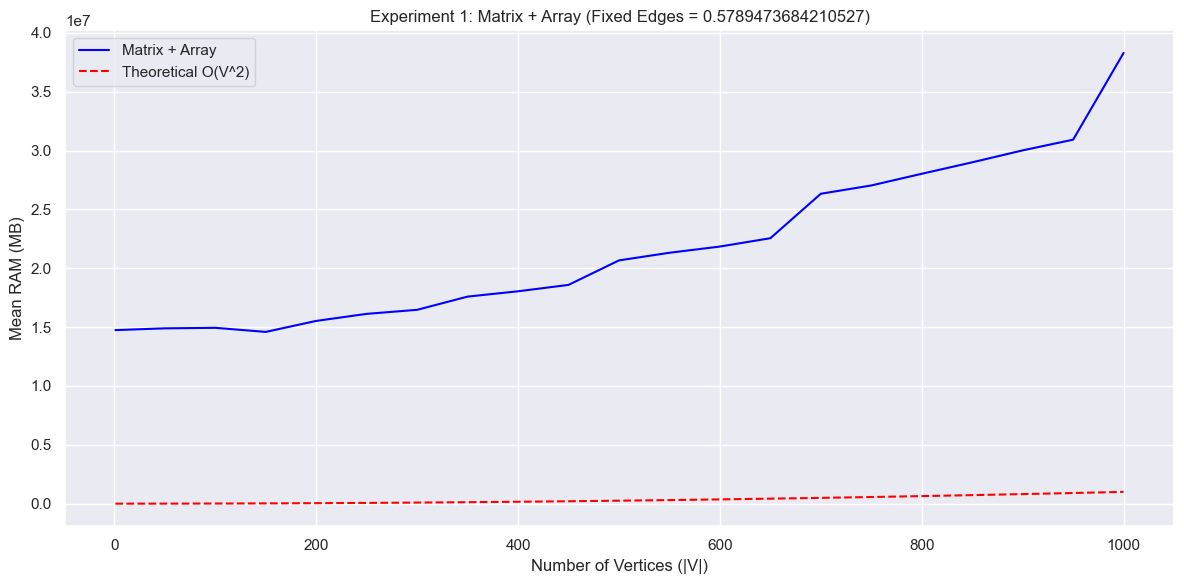

In [45]:
# Set the fixed number of edges
fixed_edges = 0.5789473684210527  # or any desired number of edges

# Filter the DataFrame for Experiment 1: Adjacency Matrix and Priority Queue as Array
experiment_1 = df[(df['graph_adj'] == 'matrix') & 
                   (df['priority_queue'] == 'array') & 
                   (df['p_edge'] == fixed_edges)]

# Grouping for Experiment 1
grouped_experiment_1 = experiment_1.groupby(['n_vertex']).agg({
    'ram': ['mean', 'std'],   
    'time': ['mean', 'std']    
}).reset_index()

grouped_experiment_1.columns = ['n_vertex', 'mean_ram', 'std_ram', 'mean_time_taken', 'std_time_taken']

# Generate the theoretical O(V^2) data
grouped_experiment_1['theoretical_O_V2'] = grouped_experiment_1['n_vertex'] ** 2

# Plotting
plt.figure(figsize=(12, 6))

# Plot for Experiment 1 with O(V^2)
sns.lineplot(data=grouped_experiment_1, x='n_vertex', y='mean_ram', label='Matrix + Array', color='blue')
sns.lineplot(data=grouped_experiment_1, x='n_vertex', y='theoretical_O_V2', label='Theoretical O(V^2)', color='red', linestyle='--')

# Title and labels
plt.title(f'Experiment 1: Matrix + Array (Fixed Edges = {fixed_edges})')
plt.xlabel('Number of Vertices (|V|)')
plt.ylabel('Mean RAM (MB)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [9]:
df = pd.read_csv('results.csv')

In [10]:
# Experiment 1: Adjacency Matrix and Priority Queue as Array
experiment_1 = df[(df['graph_adj'] == 'matrix') & (df['priority_queue'] == 'array')]

# Experiment 2: Adjacency List and Priority Queue as Heap
experiment_2 = df[(df['graph_adj'] == 'list') & (df['priority_queue'] == 'heap')]


In [11]:
# Grouping for Experiment 1
grouped_experiment_1 = experiment_1.groupby(['n_vertex', 'p_edge']).agg({
    'ram': ['mean', 'std'],   # Calculate mean and std dev for RAM
    'time': ['mean', 'std']    # Calculate mean and std dev for time
}).reset_index()

# Flatten the MultiIndex columns
grouped_experiment_1.columns = ['n_vertex', 'p_edge', 'mean_ram', 'std_ram', 'mean_time_taken', 'std_time_taken']

# Display the results for Experiment 1
print("Final Grouped Data for Experiment 1 (Mean RAM and Mean Time Taken):")
print(grouped_experiment_1)

# Grouping for Experiment 2
grouped_experiment_2 = experiment_2.groupby(['n_vertex', 'p_edge']).agg({
    'ram': ['mean', 'std'],   # Calculate mean and std dev for RAM
    'time': ['mean', 'std']    # Calculate mean and std dev for time
}).reset_index()

Final Grouped Data for Experiment 1 (Mean RAM and Mean Time Taken):
     n_vertex    p_edge      mean_ram       std_ram  mean_time_taken  \
0           1  0.000000  1.425203e+07  2.691964e+06         6.064810   
1           1  0.052632  1.473331e+07  3.818222e+04         5.610430   
2           1  0.105263  1.474150e+07  3.332818e+04         7.223399   
3           1  0.157895  1.474150e+07  3.332818e+04         7.087736   
4           1  0.210526  1.474423e+07  3.105170e+04         5.961244   
..        ...       ...           ...           ...              ...   
415      1000  0.789474  4.081254e+07  0.000000e+00         5.942247   
416      1000  0.842105  4.144742e+07  0.000000e+00         8.301756   
417      1000  0.894737  4.179176e+07  1.524065e+06         7.036970   
418      1000  0.947368  4.270899e+07  0.000000e+00         7.815227   
419      1000  1.000000  4.333568e+07  0.000000e+00         8.463098   

     std_time_taken  
0          6.488501  
1          5.183067  
2

In [12]:

# Flatten the MultiIndex columns
grouped_experiment_2.columns = ['n_vertex', 'p_edge', 'mean_ram', 'std_ram', 'mean_time_taken', 'std_time_taken']

# Display the results for Experiment 2
print("\nFinal Grouped Data for Experiment 2 (Mean RAM and Mean Time Taken):")
print(grouped_experiment_2)


Final Grouped Data for Experiment 2 (Mean RAM and Mean Time Taken):
     n_vertex    p_edge      mean_ram       std_ram  mean_time_taken  \
0           1  0.000000  1.473604e+07  3.684569e+04         7.129046   
1           1  0.052632  1.474970e+07  2.499613e+04         7.581333   
2           1  0.105263  1.473877e+07  3.524060e+04         7.665111   
3           1  0.157895  1.475243e+07  2.078377e+04         5.767951   
4           1  0.210526  1.474697e+07  2.832350e+04         8.917935   
..        ...       ...           ...           ...              ...   
415      1000  0.789474  5.038080e+07  0.000000e+00         9.047850   
416      1000  0.842105  5.057099e+07  2.104073e+06         7.224912   
417      1000  0.894737  5.145259e+07  8.151280e+05         6.965438   
418      1000  0.947368  5.222810e+07  0.000000e+00         8.322231   
419      1000  1.000000  5.181030e+07  1.929386e+06         8.050476   

     std_time_taken  
0          5.887958  
1          7.656885  


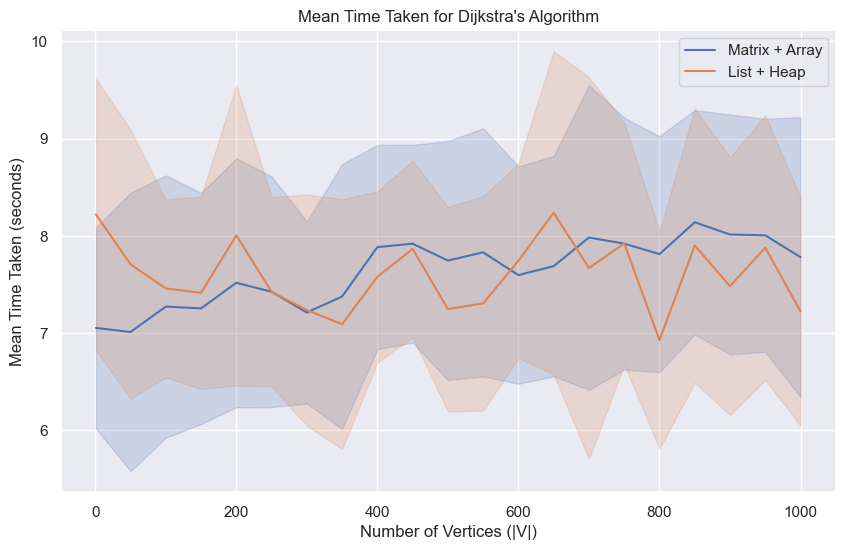

In [14]:
# Example: Plotting mean time taken for both experiments
plt.figure(figsize=(10, 6))

# Plot for Experiment 1
sns.lineplot(data=grouped_experiment_1, x='n_vertex', y='mean_time_taken', label='Matrix + Array', errorbar='sd')

# Plot for Experiment 2
sns.lineplot(data=grouped_experiment_2, x='n_vertex', y='mean_time_taken', label='List + Heap', errorbar='sd')

plt.title('Mean Time Taken for Dijkstra\'s Algorithm')
plt.xlabel('Number of Vertices (|V|)')
plt.ylabel('Mean Time Taken (seconds)')
plt.legend()
plt.grid(True)
plt.show()
